<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Introduction_to_Customer_Segmentation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/introduction-customer-segmentation-python

In [1]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [3]:
data = pd.read_excel("https://raw.githubusercontent.com/Deepaknatural/Training/master/Online_Retail.xlsx", engine="openpyxl")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data= data[pd.notnull(data['CustomerID'])]

In [7]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

<Axes: xlabel='Country'>

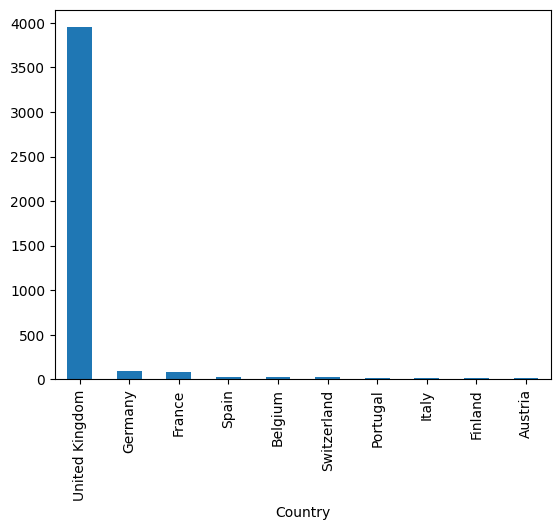

In [8]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [9]:
uk_data=data[data.Country=='United Kingdom']

In [11]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [12]:
uk_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,361878.000000,361878,361878.000000,361878.000000
mean,11.077029,2011-07-10 23:48:12.301493760,3.256007,15547.871368
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 17:25:00,1.250000,14194.000000
50%,4.000000,2011-07-31 13:07:00,1.950000,15514.000000
75%,12.000000,2011-10-23 11:39:00,3.750000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,263.129266,NaN,70.654731,1594.402590


In [13]:
uk_data = uk_data[(uk_data['Quantity']>0)]

In [14]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [16]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [17]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [18]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [19]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [20]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [21]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [22]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [30]:
rfm.columns=['monetary', 'recency', 'frequency']

In [31]:
rfm['recency'] = rfm['recency'].astype(int)

In [32]:
rfm.head()

,monetary,recency,frequency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [33]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [34]:
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,1
12747.0,2,103,4196.01,4,1,4
12748.0,0,4596,33719.73,4,1,4
12749.0,3,199,4090.88,4,1,4
12820.0,3,59,942.34,3,2,4


In [35]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,1,111
12747.0,2,103,4196.01,4,1,4,414
12748.0,0,4596,33719.73,4,1,4,414
12749.0,3,199,4090.88,4,1,4,414
12820.0,3,59,942.34,3,2,4,324


In [36]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
16754.0,372,2,2002.4,1,1,1,111
12346.0,325,1,77183.6,1,1,1,111
15749.0,235,10,44534.3,1,1,1,111
16698.0,226,5,1998.0,1,1,1,111
13135.0,196,1,3096.0,1,1,1,111
